In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()
# /device:GPU:0

'/device:GPU:0'

In [ ]:
import os
# import random
# import numpy as np
import tensorflow as tf
import zipfile

In [ ]:
# extract dataset
# Change zip file path in the directory
path_zip = "/content/drive/MyDrive/bisindo.zip"

# Change path_extract to the desired path
path_extract = "/content/drive/MyDrive/"

# Extract zip file
# for safety reason, best to comment this out
# with zipfile.ZipFile(path_zip, 'r') as zip_ref:
#     zip_ref.extractall(path_extract)

# shows list of files/folders in the zip
extracted_files = os.listdir(path_extract)
print("Extracted file:", extracted_files)

In [ ]:
# get dataset
# move to local instead of drive its faster for training time
BASE_DIR = '/content/bisindo/images'

TRAINING_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')

In [ ]:
from PIL import Image

# change dir path, check for training or validation
dir_path = TRAINING_DIR

# check for any corrupt image
for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        try:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            img.verify()  # This will raise an error if the file is corrupted
        except Exception as e:
            print(f"Error with file {file}: {e}")

In [ ]:
# see the sub folders(A, B, C, etc) and the amount of images in it
for folder in os.listdir(TRAINING_DIR):
    folder_path = os.path.join(TRAINING_DIR, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f'Folder train {folder} has {num_images} images.')

print(); print()


for folder in os.listdir(VAL_DIR):
    folder_path = os.path.join(VAL_DIR, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f'Folder validation {folder} has {num_images} images.')

Folder train A has 350 images.
Folder train B has 351 images.
Folder train C has 343 images.
Folder train D has 348 images.
Folder train E has 352 images.
Folder train F has 357 images.
Folder train G has 360 images.
Folder train H has 348 images.
Folder train I has 360 images.
Folder train J has 360 images.
Folder train K has 348 images.
Folder train L has 357 images.
Folder train M has 355 images.
Folder train N has 350 images.
Folder train O has 357 images.
Folder train P has 357 images.
Folder train Q has 348 images.
Folder train R has 350 images.
Folder train S has 343 images.
Folder train T has 360 images.
Folder train U has 355 images.
Folder train V has 357 images.
Folder train W has 360 images.
Folder train X has 355 images.
Folder train Y has 328 images.
Folder train Z has 360 images.


Folder validation A has 88 images.
Folder validation B has 88 images.
Folder validation C has 86 images.
Folder validation D has 87 images.
Folder validation E has 89 images.
Folder validation

In [ ]:
# check the images
# this isnt necessarily put for the model training, just to check the dataset
train_images = [] #to append all a-z train images
val_images = [] #to append all a-z test images

for folder in os.listdir(TRAINING_DIR):
    folder_path = os.path.join(TRAINING_DIR, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
          # image_path = os.path.join(folder_path, image_file)
          # remove the explicit path
          image_path = os.path.relpath(os.path.join(folder_path, image_file), TRAINING_DIR)
          train_images.append(image_path)

for folder in os.listdir(VAL_DIR):
    folder_path = os.path.join(VAL_DIR, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
          # remove the explicit path
          image_path = os.path.relpath(os.path.join(folder_path, image_file), VAL_DIR)
          val_images.append(image_path)

print(f'Total images in training set: {len(train_images)} ')
print(f'Total images in test set: {len(val_images)} ')

# show alphabet folder and the image in it
print(f"20 files in the subdir: {sorted(train_images)[:20] } ")
print(f"20 files in the subdir: {sorted(val_images)[:20] } ")

Total images in training set: 9169 
Total images in test set: 2301 
20 files in the subdir: ['A/IMG_20191210_180125.jpg', 'A/IMG_20191210_180205.jpg', 'A/IMG_20191210_180224.jpg', 'A/augmented_image_1.jpg', 'A/augmented_image_10.jpg', 'A/augmented_image_100.jpg', 'A/augmented_image_11.jpg', 'A/augmented_image_12.jpg', 'A/augmented_image_13.jpg', 'A/augmented_image_14.jpg', 'A/augmented_image_16.jpg', 'A/augmented_image_17.jpg', 'A/augmented_image_20.jpg', 'A/augmented_image_21.jpg', 'A/augmented_image_22.jpg', 'A/augmented_image_24.jpg', 'A/augmented_image_25.jpg', 'A/augmented_image_26.jpg', 'A/augmented_image_27.jpg', 'A/augmented_image_28.jpg'] 
20 files in the subdir: ['A/augmented_image_0.jpg', 'A/augmented_image_15.jpg', 'A/augmented_image_18.jpg', 'A/augmented_image_19.jpg', 'A/augmented_image_2.jpg', 'A/augmented_image_23.jpg', 'A/augmented_image_33.jpg', 'A/augmented_image_36.jpg', 'A/augmented_image_44.jpg', 'A/augmented_image_49.jpg', 'A/augmented_image_6.jpg', 'A/augmented_


# model -subject to change

In [ ]:
# Pre process dataset
# part of the datasets had augmentation in them, no need to augment the images further
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size= IMAGE_SIZE,
    batch_size= BATCH_SIZE, # Process 32 images at a time
    label_mode= 'categorical', # turns to one-hot encoded ( A = [1, 0, 0, ..., 0 ] )

    # if want to split into validation
    # validation_split= 0.2, # 20% for validation
    # subset= "training",
    # seed= 42, # for shuffling and transformations, dont know why its 42 but most used it
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size= IMAGE_SIZE,
    batch_size= BATCH_SIZE,
    label_mode= 'categorical',

    # validation_split= 0.2,
    # subset= "validation",
    # seed= 42,
)

# Apply rescaling
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 9169 files belonging to 26 classes.
Found 2301 files belonging to 26 classes.


In [ ]:
# optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 100
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .shuffle(SHUFFLE_BUFFER_SIZE) #shuffles the dataset
                       .cache()
                       .prefetch(PREFETCH_BUFFER_SIZE) # load the next data while the model is training to reduce training time
                       )

val_dataset_final = (val_dataset
                      .shuffle(SHUFFLE_BUFFER_SIZE)
                      .cache()
                      .prefetch(PREFETCH_BUFFER_SIZE)
                    )

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        # Check the original conditions (train accuracy >= 95% and val accuracy >= 90%)
        if logs['accuracy'] >= 0.95 and logs['val_accuracy'] >= 0.9:
            self.model.stop_training = True
            print("\nReached 95% training accuracy and 90% validation accuracy, cancelling training!")
            return  # Stop the callback here if conditions are met


In [ ]:
# build model

# Define a learning rate schedule using tf.keras.optimizers.schedules
initial_lr = 0.001  # starting learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= initial_lr,
    decay_steps= 10000,  # How often to apply the decreasing lr (every 10.000 steps)
    decay_rate= 0.5,  # how much reduced - reduce by half
    staircase= True # keep changing every decay_steps, instead of every step
  )


model = tf.keras.models.Sequential([
    tf.keras.Input(shape=IMAGE_SIZE + (3,)), # (224, 224, 3)

    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # # The fourth convolution, should be 256
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    #adding this layer cause the model not learning anything
    # tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Print the model summary
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,824,794 (26.03 MB)

 Trainable params: 6,824,794 (26.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
      train_dataset_final,
      epochs=100,
      validation_data=val_dataset_final,
      callbacks=[EarlyStoppingCallback()]
    )
# takes 36 mins in total

Epoch 1/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 2084s 5s/step - accuracy: 0.2896 - loss: 2.4962 - val_accuracy: 0.8023 - val_loss: 0.6899
Epoch 2/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.8236 - loss: 0.6438 - val_accuracy: 0.8514 - val_loss: 0.4827
Epoch 3/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8886 - loss: 0.3597 - val_accuracy: 0.8783 - val_loss: 0.4650
Epoch 4/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9380 - loss: 0.1954 - val_accuracy: 0.9031 - val_loss: 0.3819
Epoch 5/100
287/287 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9638 - loss: 0.1103 - val_accuracy: 0.8957 - val_loss: 0.4478
Epoch 6/100
286/287 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9692 - loss: 0.1045
Reached 95% training accuracy and 90% validation accuracy, cancelling training!
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9693 - loss: 0.1044 - val_accuracy: 0.9126 - val_loss: 0.4349


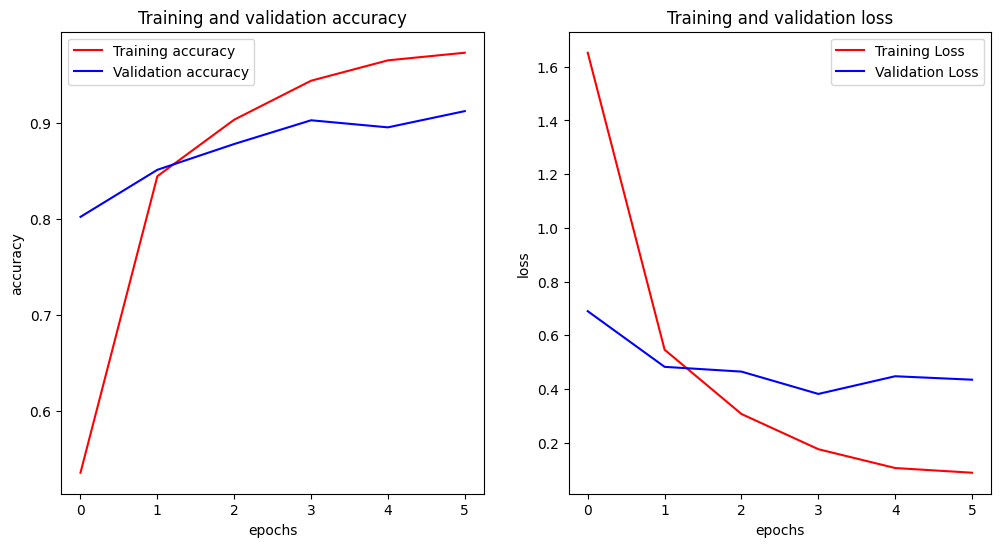

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'r', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'r', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

In [ ]:
# # Save the entire model to a HDF5 file.
# model.save('my_model.h5')
# # model.save('my_model.keras')

In [ ]:
# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_model.h5')

# # # Show the model architecture
# new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,824,795 (26.03 MB)

 Trainable params: 6,824,794 (26.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)